In [16]:
import numpy as np

In [17]:
import pandas as pd

In [18]:
import warnings

In [19]:
warnings.filterwarnings('ignore')

In [20]:
df=pd.read_csv('Forest_fire.csv')                  #Reading the data 

In [21]:
df.head()

,Area,month,day,area,Oxygen,Temperature,Humidity,Fire Occurrence
0,Jharkand,mar,fri,0.0,40,45,20,1
1,Bangalore,oct,tue,0.0,50,30,10,1
2,Ecuador,oct,sat,0.0,10,20,70,0
3,Anantapur,mar,fri,0.0,60,45,70,1
4,Bangalore,mar,sun,0.0,30,48,10,1


In [22]:
type(df)

pandas.core.frame.DataFrame

In [23]:
df.dtypes

Area                object
month               object
day                 object
area               float64
Oxygen               int64
Temperature          int64
Humidity             int64
Fire Occurrence      int64
dtype: object

In [24]:
df.shape

(1485, 8)

In [25]:
df.isnull().sum()

Area               0
month              0
day                0
area               0
Oxygen             0
Temperature        0
Humidity           0
Fire Occurrence    0
dtype: int64

In [26]:
import matplotlib.pyplot as plt

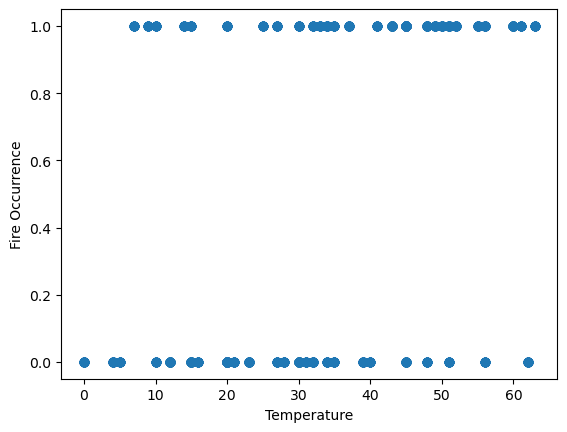

In [27]:
plt.scatter(df['Temperature'],df['Fire Occurrence'])
plt.xlabel('Temperature')
plt.ylabel('Fire Occurrence')
plt.show()

In [29]:
x=df.iloc[:,4:-1]
x.head()

,Oxygen,Temperature,Humidity
0,40,45,20
1,50,30,10
2,10,20,70
3,60,45,70
4,30,48,10


In [31]:
y=df.iloc[:,-1]
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Fire Occurrence, dtype: int64

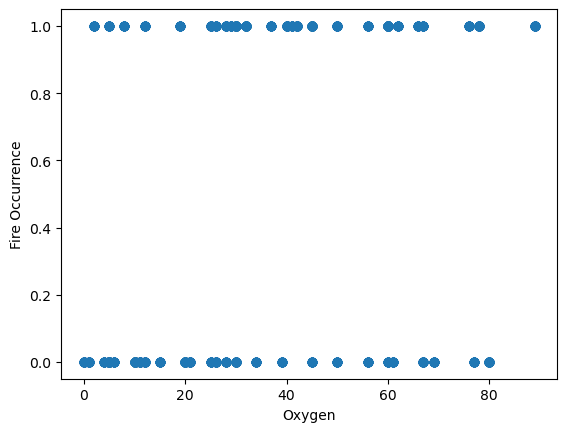

In [32]:
plt.scatter(df['Oxygen'],df['Fire Occurrence'])
plt.xlabel('Oxygen')
plt.ylabel('Fire Occurrence')
plt.show()

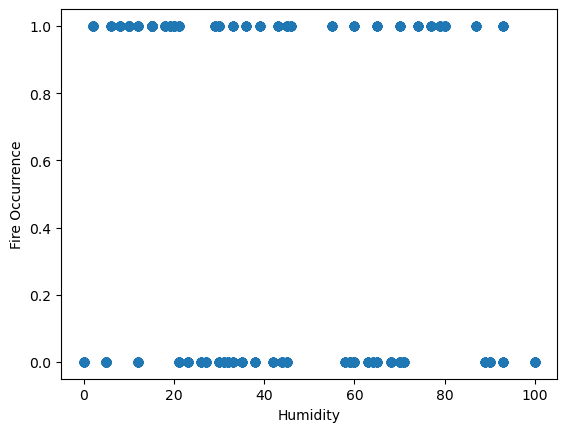

In [33]:
plt.scatter(df['Humidity'],df['Fire Occurrence'])
plt.xlabel('Humidity')
plt.ylabel('Fire Occurrence')
plt.show()

In [34]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [35]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x,y)

LinearRegression()

In [36]:
print('Model Score',mlr.score(x,y))

Model Score 0.3378648749948423


In [37]:
ypred_mlr=mlr.predict(x)
print(ypred_mlr)

[0.72846513 0.63050773 0.08278234 ... 0.12991714 0.56752331 0.64738413]


In [38]:
df['fire_pred']=ypred_mlr
df.head()

,Area,month,day,area,Oxygen,Temperature,Humidity,Fire Occurrence,fire_pred
0,Jharkand,mar,fri,0.0,40,45,20,1,0.728465
1,Bangalore,oct,tue,0.0,50,30,10,1,0.630508
2,Ecuador,oct,sat,0.0,10,20,70,0,0.082782
3,Anantapur,mar,fri,0.0,60,45,70,1,0.672695
4,Bangalore,mar,sun,0.0,30,48,10,1,0.743635


In [39]:
m=mlr.coef_
c=mlr.intercept_
print('Coefficient',m)
print("Intercept",c)

Coefficient [ 0.00556446  0.01246759 -0.00334119]
Intercept 0.011669172587454535


In [40]:
df['fire_pred_eqn']=df['Temperature']*m[0]+df['Oxygen']*m[1]+df['Humidity']*m[2]+c
df.head(6)

,Area,month,day,area,Oxygen,Temperature,Humidity,Fire Occurrence,fire_pred,fire_pred_eqn
0,Jharkand,mar,fri,0.0,40,45,20,1,0.728465,0.693949
1,Bangalore,oct,tue,0.0,50,30,10,1,0.630508,0.768570
2,Ecuador,oct,sat,0.0,10,20,70,0,0.082782,0.013751
3,Anantapur,mar,fri,0.0,60,45,70,1,0.672695,0.776242
4,Bangalore,mar,sun,0.0,30,48,10,1,0.743635,0.619379
5,Adoni,aug,sun,0.0,50,15,30,0,0.376670,0.618280


In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [42]:
mse = mean_squared_error(y,ypred_mlr)
rmse = np.sqrt(mean_squared_error(y,ypred_mlr))
mae = mean_absolute_error(y,ypred_mlr)
r2s = r2_score(y,ypred_mlr)
print('MSE',mse)
print('RMSE',rmse)
print('MAE',mae)
print('R2_score',r2s)
print('Model score',mlr.score(x,y))

MSE 0.16551689177253714
RMSE 0.4068376725089961
MAE 0.33515926436748356
R2_score 0.3378648749948423
Model score 0.3378648749948423


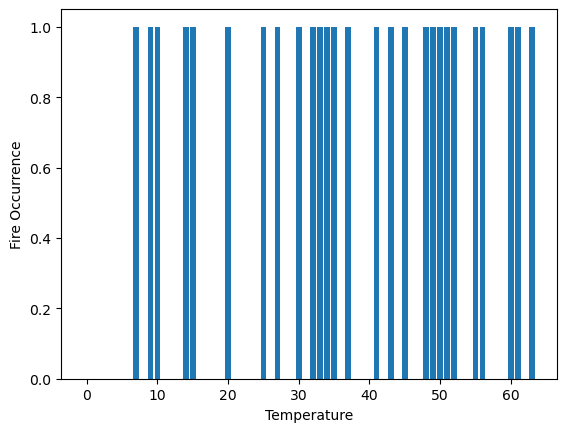

In [43]:
s1=df['Temperature']
s2=df['Fire Occurrence']
plt.bar(s1,s2)
plt.xlabel('Temperature')
plt.ylabel("Fire Occurrence")
plt.show()

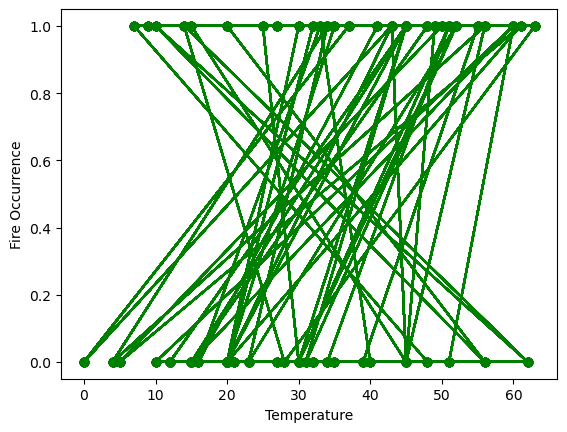

In [44]:
plt.plot(s1,s2,color='green',marker='o')
plt.ylabel('Fire Occurrence')
plt.xlabel('Temperature')
plt.show()

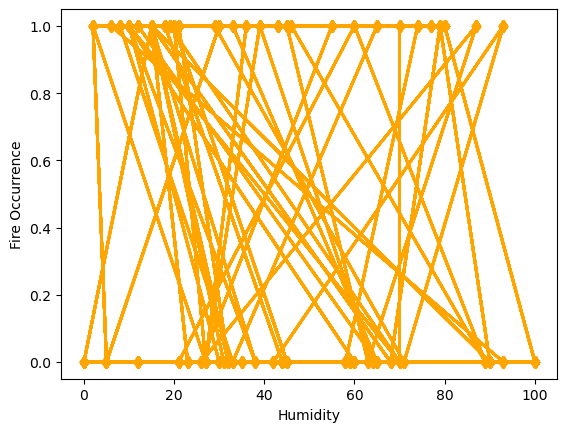

In [45]:
s3=df['Humidity']
plt.plot(s3,s2,color='orange',marker='d',lw=2,linestyle=':')
plt.ylabel('Fire Occurrence')
plt.xlabel('Humidity')
plt.show()

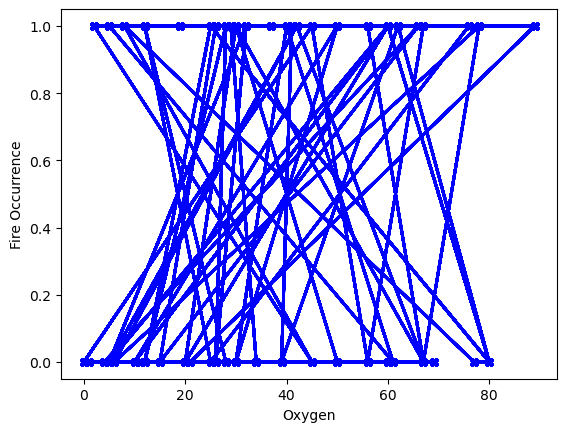

In [46]:
s4=df['Oxygen']
plt.plot(s4,s2,color='blue',marker='X',lw=2,linestyle='--')
plt.xlabel('Oxygen')
plt.ylabel('Fire Occurrence')
plt.show()

In [47]:
d1=df['Fire Occurrence'].value_counts()

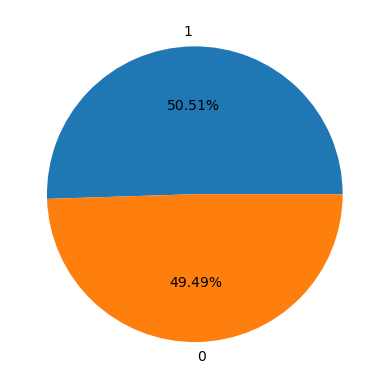

In [48]:
plt.pie(d1,labels=d1.index,autopct="%.2f%%")
plt.show()

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.25)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)


(1113, 3)
(372, 3)
(1113,)
(372,)


In [51]:
from sklearn.metrics import confusion_matrix,classification_report

In [52]:
d1=df['Fire Occurrence'].value_counts()
d1

1    750
0    735
Name: Fire Occurrence, dtype: int64

# LOGISTIC REGRESSION

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
log=LogisticRegression(solver='liblinear')
log.fit(x_tr,y_tr)

LogisticRegression(solver='liblinear')

In [55]:
ypred_log=log.predict(x_te)
print(ypred_log)

[1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1
 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0
 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0
 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1
 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0
 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1
 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1
 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1
 0 0]


In [56]:
print('Training Score',log.score(x_tr,y_tr))
print('Testing Score',log.score(x_te,y_te))

Training Score 0.8337825696316262
Testing Score 0.8118279569892473


In [57]:
cm_log=confusion_matrix(y_te,ypred_log)
print(cm_log)
print(classification_report(y_te,ypred_log))

[[127  37]
 [ 33 175]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       164
           1       0.83      0.84      0.83       208

    accuracy                           0.81       372
   macro avg       0.81      0.81      0.81       372
weighted avg       0.81      0.81      0.81       372



# RANDOM FOREST CLASSIFIER

In [58]:
from sklearn.ensemble import RandomForestClassifier
m3=RandomForestClassifier(n_estimators=10,max_depth=4,criterion='entropy',min_samples_split=10)
m3.fit(x_tr,y_tr)
ypred_m3=m3.predict(x_te)
cm3=confusion_matrix(y_te,ypred_m3)
print(cm3)
print(classification_report(y_te,ypred_m3))

print('Training Score',m3.score(x_tr,y_tr))
print('Testing Score',m3.score(x_te,y_te))

[[155   9]
 [ 27 181]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       164
           1       0.95      0.87      0.91       208

    accuracy                           0.90       372
   macro avg       0.90      0.91      0.90       372
weighted avg       0.91      0.90      0.90       372

Training Score 0.9245283018867925
Testing Score 0.9032258064516129


# DECISION TREE CLASSIFIER

In [59]:
from sklearn.tree import DecisionTreeClassifier
m2=DecisionTreeClassifier(max_depth=7,criterion='gini')
m2.fit(x_tr,y_tr)
ypred_m2=m2.predict(x_te)
cm2=confusion_matrix(y_te,ypred_m2)
print(cm2)
print(classification_report(y_te,ypred_m2))

print('Training Score',m2.score(x_tr,y_tr))
print('Testing Score',m2.score(x_te,y_te))

[[159   5]
 [  3 205]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       164
           1       0.98      0.99      0.98       208

    accuracy                           0.98       372
   macro avg       0.98      0.98      0.98       372
weighted avg       0.98      0.98      0.98       372

Training Score 0.9802336028751123
Testing Score 0.978494623655914


# KNN CLASSIFIER

In [60]:
from sklearn.neighbors import KNeighborsClassifier
m1=KNeighborsClassifier(n_neighbors=10)
m1.fit(x_tr,y_tr)
y_pred1=m1.predict(x_te)
y_pred1
print("shape=",x_tr.shape)
from sklearn.metrics import confusion_matrix,classification_report
cm1=confusion_matrix(y_te,y_pred1)
print(cm1)
print(classification_report(y_te,y_pred1))
print('Training Score',m1.score(x_tr,y_tr))
print('Testing Score',m1.score(x_te,y_te))

shape= (1113, 3)
[[159   5]
 [  3 205]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       164
           1       0.98      0.99      0.98       208

    accuracy                           0.98       372
   macro avg       0.98      0.98      0.98       372
weighted avg       0.98      0.98      0.98       372

Training Score 0.9802336028751123
Testing Score 0.978494623655914


In [ ]:
#By applying the models like Logistic Regression,Decision Tree,Random Forest Classifier and KNN algorithms.We found the max.accuarcy of 0.98 in Decsions Treee classifier
